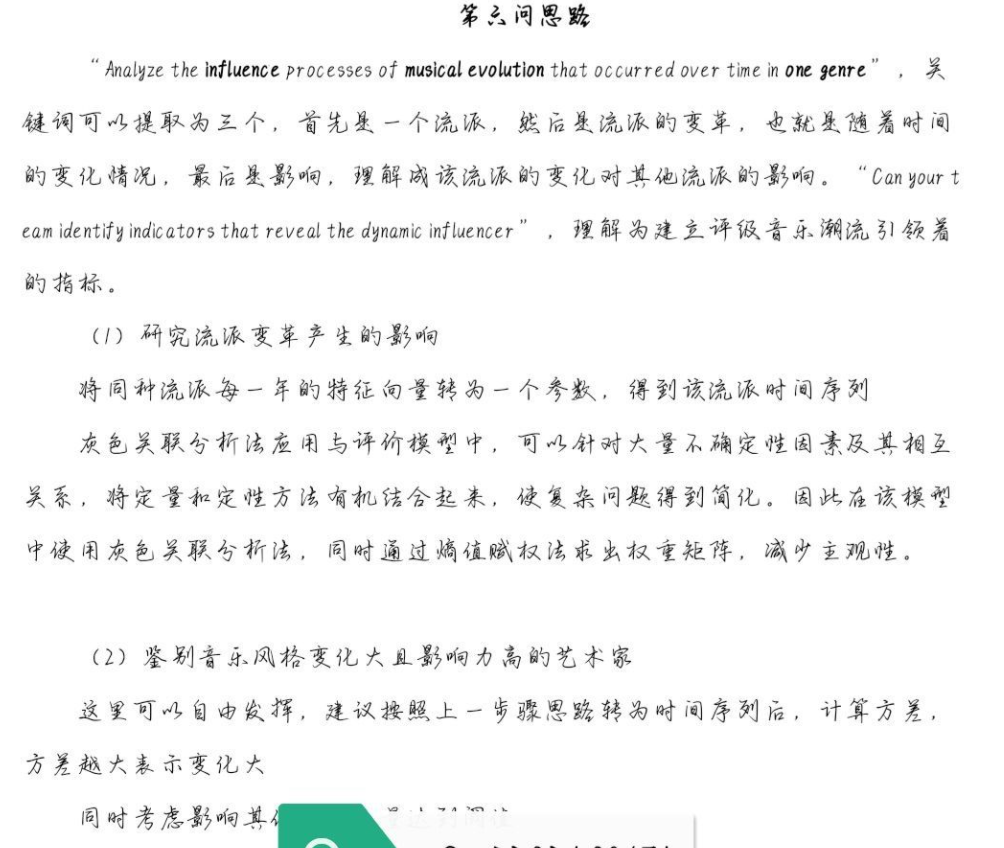

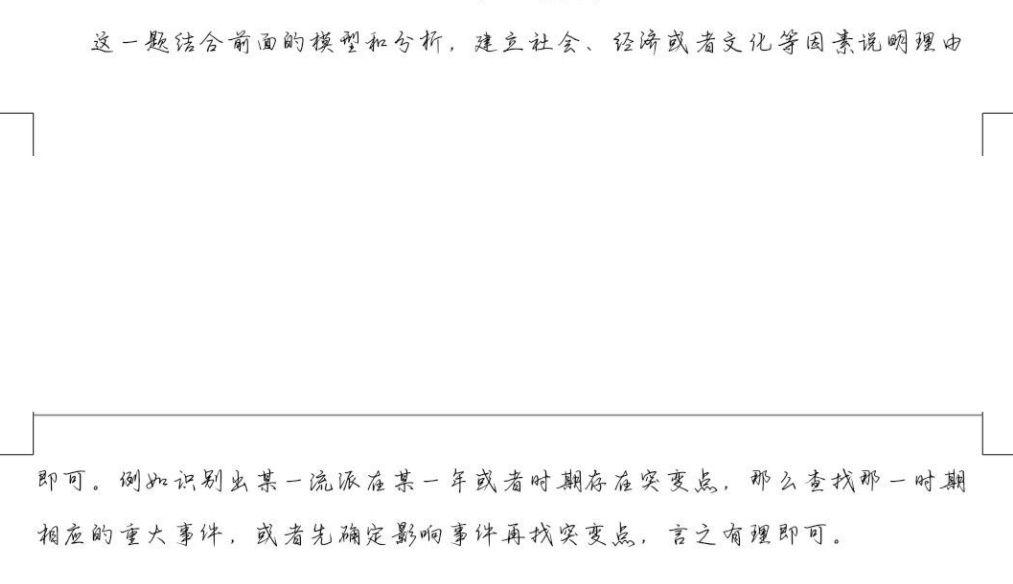

第二种思路：

制作思路较为通俗易懂，适合入门选手，所给出的模型及代码均已实现，没有空头支票。
题目翻译个别关键单词有问题，手动修改了过来，会影响题目理解。如capture、explict等
1.题目重点重述 （熟悉题目的请跳过）
我们的目标是衡量以前制作的音乐对新音乐和艺术家的影响。

一些艺术家可以列出十几个甚至更多的影响了他们自己的音乐作品艺术家。也有人建议，影

响可以通过歌曲特征(如结构、节奏或歌词)之间的相似程度来衡量。音乐有时会有革命性的

变化，以提供新的声音或节奏，例如当新的流派出现时，或者现有流派的再创造(例如古典、

流行/摇滚、爵士乐等)。这可以归因于一系列的小变化，艺术家的合作努力，一系列有影响

力的艺术家，或者社会内部的转变。

（题目开头给出了一些问题的提示：如衡量特征指标的相似程度（问题1、2）、考虑音乐节奏上的变化以衡量革命性的飞跃（问题5）、有影响力的艺术家及社会转变（问题6））

许多歌曲都有相似的旋律，许多艺术家对音乐流派的重大转变做出了贡献。有时，这些变化

是由于一位艺术家影响了另一位艺术家。有时，它是对外部事件(如重大世界事件或技术进

步)的响应而出现的变化。通过考虑歌曲的网络和它们的音乐特征，我们可以开始捕捉到音

乐艺术家对彼此的影响。也许，我们还可以更好地理解音乐是如何随着时间的推移在社会中

演变的。

您的团队受综合集体音乐协会委托来开发一种衡量音乐影响力的模型。这个问题要求你考察艺术家和流派的进化和革命趋势。为此，ICM 向您的团队提供了几个数据集：


（1）“Influence_Data”代表艺人自己报道的音乐影响者和追随者，以及行业专家的意见。这些数据包含 5854 名艺术家在过去 90 年中的影响力和追随者。

（2）“full_music_data”提供了 16 个变量条目，包括舞蹈性、节奏、响度和音调等音乐特征，以及针对 98,340 首歌曲的 artist_name 和 artist_id。

这些数据用于创建两个汇总数据集，包括:

（3）艺术家的平均值“data_by_artist”，

（4）根据年份的统计值“data_by_year”。 （这个应该没什么用 无视，处理问题6：“随时间推移” 也不是用这个数据集）

---------------------------------
2.问题回答与模型建立
Influence_Data数据集预览：

使用图与网络模型，得到所有音乐人的影响出度（追随者\影响的人）与入度(对其影响者)

音乐人ID	对其影响者	追随者	音乐人（列出前三名 查阅资料 好做文章）	
754032	31	615	The Beatles（甲壳虫乐队）	
66915	29	389	Bob Dylan
（鲍勃·迪伦）	
894465	39	319	The Rolling Stones
（滚石乐队）	
531986	25	238	...	
...	...	...	...	
当你得到了如上表，并且在图与网络模型中得到了网络关系图，你就可以大做文章了，与下文得出的相关结论，结合乐队流派与历史，开始写英语作文。（时间紧，网络关系图未作处理不放上了，注意用所有数据做出的图非常的密集，这时需要分年份\或者下文聚类、流派将有名气的乐队作为节点重新画非常好看的图）

注1：(上图只是预览 下文还将计算图与网络模型中的点度中心性来衡量一个结点的影响力)，中介中心性、接近中心性、特征向量中心性都可以使用）

问题1：

(1)使用 Influence_Data 数据集创建音乐影响力的有向网络
根据Influence_Data 数据集构建有向网络图。

这个容易，推荐使用python或者gephi软件制图，还可以进一步网络处理，关键是简单好学。

我们需要导入的数据有三列：source、target、weight（源、目标、权重）

所以第一步需要进行数据归约，构建source、target、weight数据集。影响者和追随者的数据已经有了，定义权重来解释“音乐影响力”是关键的。

如何定义“音乐影响力”权重？众所周知，音乐人之间的影响与其流派、流行时间有着不可分割的联系 ，我们需要建立一个音乐人影响力评价指标体系。由于本文是思路，就不详细展开，这个相互影响力权重以及影响力评价指标体系有多种定义方法。（此方案待定，可以简化）

(2)使用子网络描述音乐影响力，分析你建立的音乐影响力揭示了什么？
根据上表，可以选择有代表性的年份、有代表性的若干音乐人（影响力大的）重新进行制图，得出结论任意发挥。与政治历史时期或音乐发展史结果写作。（此方案待定）

问题2：

(1)用音乐特征数据集（ FULL_MUSIC_DATA）以及音乐家影响数据集（influence_data）建立音乐相似度模型。
非常容易

两个方向：相似度度量与距离度量

可以采用余弦相似度\jaccord相似系数（相似度度量）或欧式距离\切比雪夫距离（距离度量）构建相似度模型。

如用余弦相似度得到两两音乐人之间的相似度矩阵。

由于数据量大，可以先使用R型聚类分析、主成分分析的方式降维。

（2）利用该模型回答问题：流派内与流派外音乐家相似度更大吗？
该问题比较关键：

方法1：统计假设方法---方差分析\显著性检验,比如X流派中a与自身流派的相似度为{0.7,0.5,0.8,0.9,0.65}，a与Y流派中音乐人的相似度为{0.2,0.3,0.5,0.1,0.4}。我们是否可以使用求均值的方法判断不同的流派是否对相似度有影响？忽略偶然因素是可以这样的，但是我们也可以从概率统计的角度考虑进行显著性检验。

即 对于两组数据，流派的不同是否对相似度具有显著性影响？我们可以作出假设，验证，得到结论。（由于各流派的音乐人数不一样，我们需要考虑将流派人数多的一方中影响力小的的音乐人去除处理）

方法2：编程实现：选出3-5个count数最多的流派，将其里面所有的音乐人与自己流派的相似度求均值，再与其他流派的均值做对比列表解释。

问题3：

（1）比较流派之间的相似之处？流派的区别是什么？
编程问题，将音乐人与其流派链接在同一数据集中。

做法1：这里的相似之处比较定性，可以使用距离度量和余弦相似度结合计算，得出最相近\相似的流派，手动分析。

流派的区别可以根据相似度最低的流派特征手动分析。

做法2：

（2）流派是如何随着时间推移变化的？
根据数据特征画出流派关于时间变化的折线图，分别为流行指标、发行数量.......(未完)



-时间紧迫思路没有来得及制作，会持续更新，上述提到的方法和代码加群即可免费咨询。

思路总结：现在需要做的事☆
1.根据influence数据编程求出各音乐人的出度入度

2.根据full_music数据建立相似度模型，计算出音乐相似度，需要使用数据降维方法以及筛出部分再influnce数据里没有的音乐人。

3.进行显著性检验，得出不同流派对音乐的相似度有显著性影响的结论。

4.对时间轴进行处理





2021美赛D题美国大学生数学建模竞赛D题

见:https://zhuanlan.zhihu.com/p/349402726

对有向图无向图等最短路径求解等，画函数图像可使用networkx库（网络图）